In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('./data/usd_inr.csv')
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [68]:
# remove any NaN or other values
df = df.dropna()

# remove values in Y where there is a .
df = df[df['y'] != '.']
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [69]:
m = Prophet()
m.fit(df)

19:59:11 - cmdstanpy - INFO - Chain [1] start processing
19:59:15 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
13296,2025-08-05
13297,2025-08-06
13298,2025-08-07
13299,2025-08-08
13300,2025-08-09


In [71]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13296,2025-08-05,85.052984,82.961186,87.091108
13297,2025-08-06,85.060538,82.948758,87.220781
13298,2025-08-07,85.071385,83.007297,87.254096
13299,2025-08-08,85.083671,83.132306,87.253168
13300,2025-08-09,85.398823,83.420476,87.591618


/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



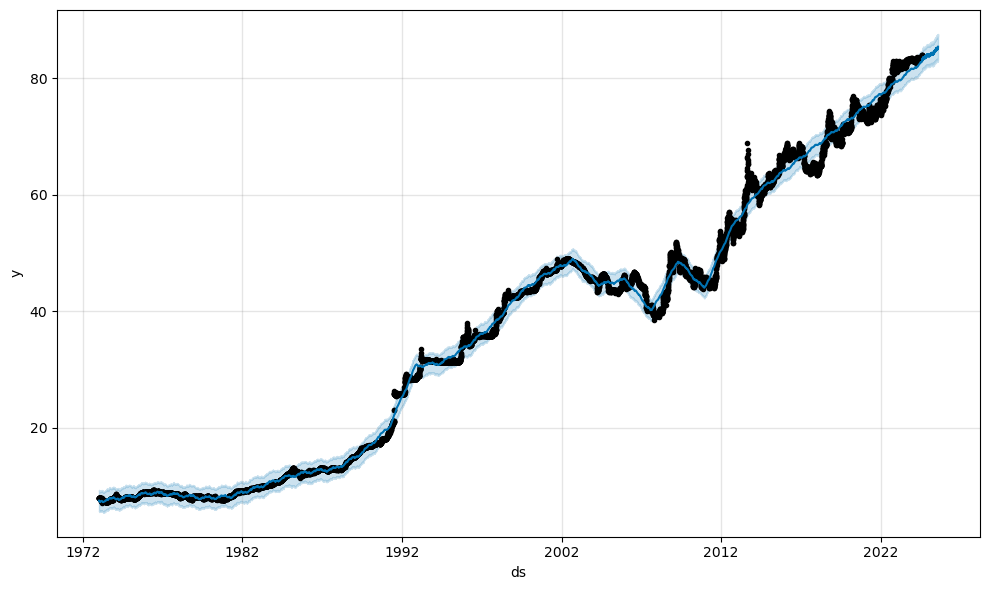

In [72]:
fig1 = m.plot(forecast)

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



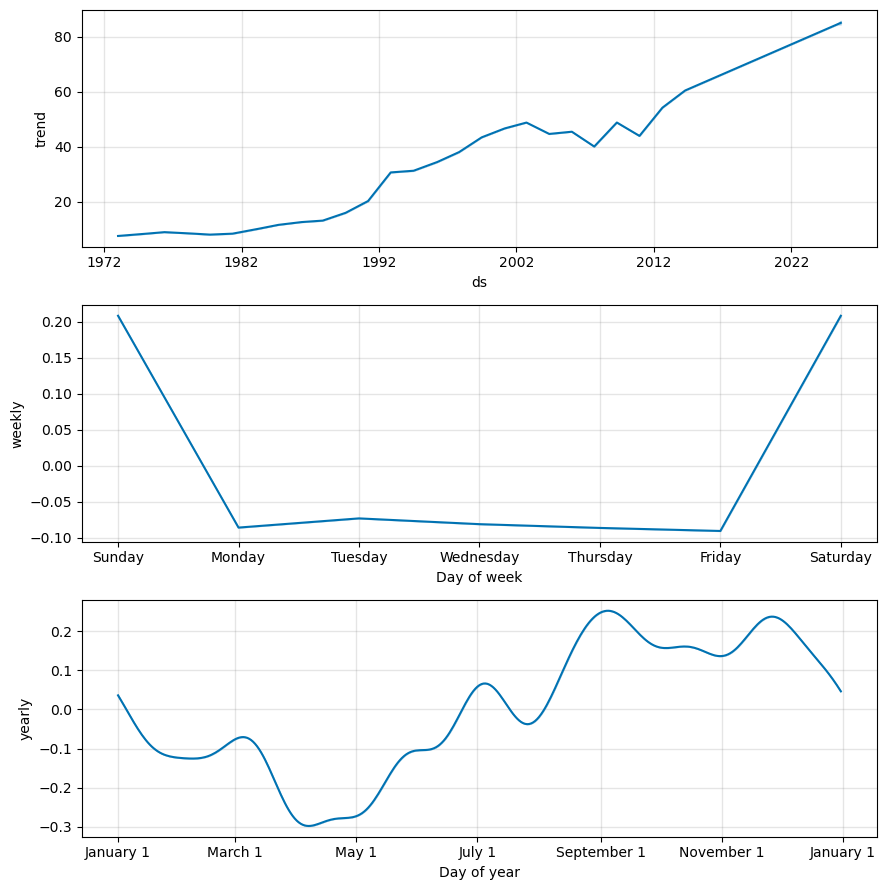

In [73]:

fig2 = m.plot_components(forecast)

In [74]:
from prophet.plot import plot_plotly, plot_components_plotly
import nbformat
import plotly.graph_objs as go
print(go)

plot_plotly(m, forecast)

<module 'plotly.graph_objs' from '/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/plotly/graph_objs/__init__.py'>


In [75]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fcst

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.583141,8.5,5.751864,9.152566,7.583141,7.583141,-0.045268,-0.045268,-0.045268,-0.072916,-0.072916,-0.072916,0.027648,0.027648,0.027648,0.0,0.0,0.0,7.537873
1,1973-01-03,7.584193,8.5,5.798535,9.230904,7.584193,7.584193,-0.061874,-0.061874,-0.061874,-0.080909,-0.080909,-0.080909,0.019035,0.019035,0.019035,0.0,0.0,0.0,7.522319
2,1973-01-04,7.585244,8.5,5.779198,9.224575,7.585244,7.585244,-0.075829,-0.075829,-0.075829,-0.086131,-0.086131,-0.086131,0.010302,0.010302,0.010302,0.0,0.0,0.0,7.509416
3,1973-01-05,7.586296,8.5,5.743879,9.262044,7.586296,7.586296,-0.088845,-0.088845,-0.088845,-0.090342,-0.090342,-0.090342,0.001497,0.001497,0.001497,0.0,0.0,0.0,7.497451
4,1973-01-08,7.589451,8.5,5.816386,9.127459,7.589451,7.589451,-0.110461,-0.110461,-0.110461,-0.085653,-0.085653,-0.085653,-0.024808,-0.024808,-0.024808,0.0,0.0,0.0,7.478990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,2029-08-05,93.806670,8.5,77.748317,110.496430,77.511902,110.088434,0.220203,0.220203,0.220203,0.207976,0.207976,0.207976,0.012227,0.012227,0.012227,0.0,0.0,0.0,94.026873
14758,2029-08-06,93.812620,8.5,77.374697,110.590766,77.519332,110.103984,-0.063829,-0.063829,-0.063829,-0.085653,-0.085653,-0.085653,0.021824,0.021824,0.021824,0.0,0.0,0.0,93.748791
14759,2029-08-07,93.818570,8.5,78.041590,110.743626,77.526761,110.119534,-0.040974,-0.040974,-0.040974,-0.072916,-0.072916,-0.072916,0.031942,0.031942,0.031942,0.0,0.0,0.0,93.777596
14760,2029-08-08,93.824520,8.5,77.675979,110.762380,77.517070,110.135084,-0.038420,-0.038420,-0.038420,-0.080909,-0.080909,-0.080909,0.042489,0.042489,0.042489,0.0,0.0,0.0,93.786100


/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



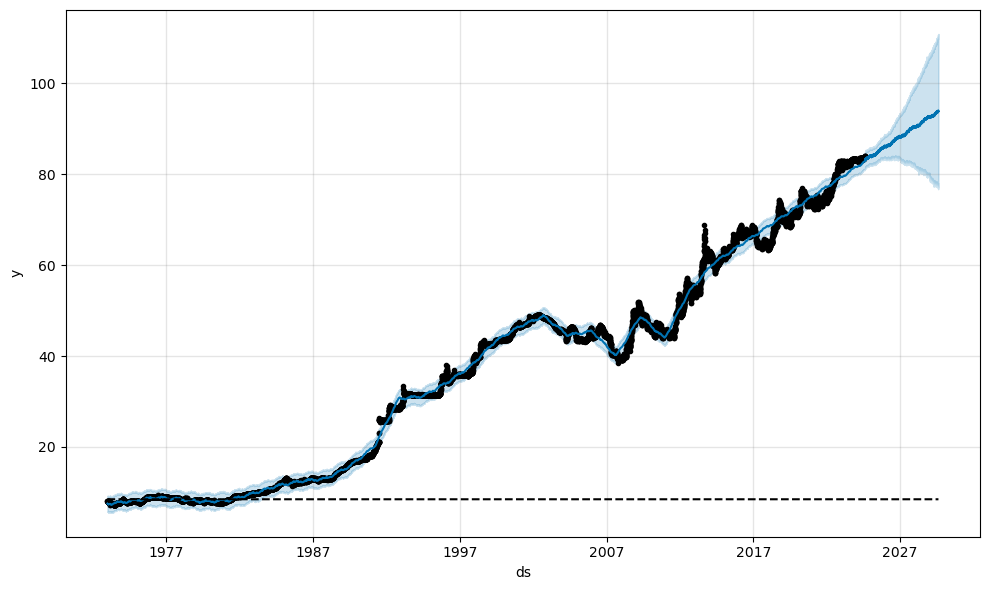

In [76]:
fig = m.plot(fcst)

In [77]:
# get yhat from fcst where ds is between 2024-08-10 and 2024-08-30
fy2024 = fcst[(fcst['ds'] > '2024-01-01') & (fcst['ds'] < '2024-12-30')][['ds', 'yhat']]

# get lowest in fy2024 along with date
low = fy2024[fy2024['yhat'] == fy2024['yhat'].min()]

# get max in fy2024 along with date
high = fy2024[fy2024['yhat'] == fy2024['yhat'].max()]

print(low)
print(high)

              ds       yhat
12794 2024-01-19  81.571541
              ds       yhat
13056 2024-12-08  84.087461
